# ANÁLISIS EDA

In [ ]:
!pip install sidetable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import io
from google.colab import files

sns.set_palette("viridis")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#cargamos el df
df_inicial=pd.read_csv('/content/dataset_limpioEDA.csv', sep=';', encoding='utf-8')

In [ ]:
df_inicial

,Producto,Precio,Precio_Unidad,Unidad,IdTipoProducto,Marca,Id_supermercado,Nombre_Super,IdCategoria,Categoria
0,Lubina 600 g aprox,"4,97","8,29",€/kg,810,Otra,S2,Carrefour,2,Marisco y pescado
1,Salmón 3 kg aprox,"35,7","11,9",€/kg,811,Otra,S2,Carrefour,2,Marisco y pescado
2,Bacaladilla 600 g aprox,"2,99","4,99",€/kg,851,Otra,S2,Carrefour,2,Marisco y pescado
3,Salmón en rodaja Calidad y Origen Carrefour 30...,"6,21","20,7",€/kg,811,Blanca,S2,Carrefour,2,Marisco y pescado
4,Lomo de Atún 400 g aprox,"7,92","19,79",€/kg,851,Otra,S2,Carrefour,2,Marisco y pescado
...,...,...,...,...,...,...,...,...,...,...
27504,Tinte rubio oscuro nº6 Palette caja 1 unidad,"4,69","4,69",€/UNIDAD,651,Otra,S3,Dia,21,Cuidado del cabello
27505,Tinte negro azulado nº1.1 Palette caja 1 unidad,"4,69","4,69",€/UNIDAD,649,Otra,S3,Dia,21,Cuidado del cabello
27506,Tinte negro nº1 Palette caja 1 unidad,"4,69","4,69",€/UNIDAD,649,Otra,S3,Dia,21,Cuidado del cabello
27507,Tinte rubio claro nº8 Palette caja 1 unidad,"4,69","4,69",€/UNIDAD,651,Otra,S3,Dia,21,Cuidado del cabello


In [ ]:
# Convertir las columnas de precio de string a float, reemplazando comas por puntos
df_inicial['Precio'] = df_inicial['Precio'].str.replace(',', '.').astype(float)
df_inicial['Precio_Unidad'] = df_inicial['Precio_Unidad'].str.replace(',', '.').astype(float)

In [ ]:
print(df_inicial.isnull().sum())

Producto           0
Precio             0
Precio_Unidad      0
Unidad             2
IdTipoProducto     0
Marca              0
Id_supermercado    0
Nombre_Super       0
IdCategoria        0
Categoria          0
dtype: int64


In [ ]:
nulos = df_inicial[df_inicial.isnull().any(axis=1)]
print(nulos)

                                  Producto  Precio  Precio_Unidad Unidad  \
15760      Bastoncillos de algodón 200 ud.    0.79            0.0    NaN   
15761  Bastoncillos Carrefour Soft 300 ud.    1.35            0.0    NaN   

       IdTipoProducto   Marca Id_supermercado Nombre_Super  IdCategoria  \
15760             686    Otra              S2    Carrefour           23   
15761             686  Blanca              S2    Carrefour           23   

                        Categoria  
15760  Fitoterapia y parafarmacia  
15761  Fitoterapia y parafarmacia  


## LIMPIEZA DE DATOS

In [ ]:
#Eliminar filas nulas
df1 = df_inicial.dropna()

In [ ]:
#Eliminar filas donde la columna 'Precio_Unidad' tiene un valor nulo
df = df1.dropna(subset=['Precio_Unidad'])

In [ ]:
print(df.isnull().sum())

Producto           0
Precio             0
Precio_Unidad      0
Unidad             0
IdTipoProducto     0
Marca              0
Id_supermercado    0
Nombre_Super       0
IdCategoria        0
Categoria          0
dtype: int64


In [ ]:
df

,Producto,Precio,Precio_Unidad,Unidad,IdTipoProducto,Marca,Id_supermercado,Nombre_Super,IdCategoria,Categoria
0,Lubina 600 g aprox,4.97,8.29,€/kg,810,Otra,S2,Carrefour,2,Marisco y pescado
1,Salmón 3 kg aprox,35.70,11.90,€/kg,811,Otra,S2,Carrefour,2,Marisco y pescado
2,Bacaladilla 600 g aprox,2.99,4.99,€/kg,851,Otra,S2,Carrefour,2,Marisco y pescado
3,Salmón en rodaja Calidad y Origen Carrefour 30...,6.21,20.70,€/kg,811,Blanca,S2,Carrefour,2,Marisco y pescado
4,Lomo de Atún 400 g aprox,7.92,19.79,€/kg,851,Otra,S2,Carrefour,2,Marisco y pescado
...,...,...,...,...,...,...,...,...,...,...
27504,Tinte rubio oscuro nº6 Palette caja 1 unidad,4.69,4.69,€/UNIDAD,651,Otra,S3,Dia,21,Cuidado del cabello
27505,Tinte negro azulado nº1.1 Palette caja 1 unidad,4.69,4.69,€/UNIDAD,649,Otra,S3,Dia,21,Cuidado del cabello
27506,Tinte negro nº1 Palette caja 1 unidad,4.69,4.69,€/UNIDAD,649,Otra,S3,Dia,21,Cuidado del cabello
27507,Tinte rubio claro nº8 Palette caja 1 unidad,4.69,4.69,€/UNIDAD,651,Otra,S3,Dia,21,Cuidado del cabello


In [ ]:
print("Filas del dataset:", df.shape[0])
print("Columnas del dataset:", df.shape[1])

Filas del dataset: 27507
Columnas del dataset: 10


In [ ]:
#Revisar tipos de datos
print(df.dtypes)

Producto            object
Precio             float64
Precio_Unidad      float64
Unidad              object
IdTipoProducto       int64
Marca               object
Id_supermercado     object
Nombre_Super        object
IdCategoria          int64
Categoria           object
dtype: object


In [ ]:
# Convertir columnas específicas a tipo categórico
df['Marca'] = df['Marca'].astype('category')
df['Id_supermercado'] = df['Id_supermercado'].astype('category')
df['Nombre_Super'] = df['Nombre_Super'].astype('category')
df['Categoria'] = df['Categoria'].astype('category')

# Verificación de los cambios
df.dtypes

Producto             object
Precio              float64
Precio_Unidad       float64
Unidad               object
IdTipoProducto        int64
Marca              category
Id_supermercado    category
Nombre_Super       category
IdCategoria           int64
Categoria          category
dtype: object

In [ ]:
# Mostrar información del DataFrame para verificar los tipos de datos y los valores faltantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27507 entries, 0 to 27508
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Producto         27507 non-null  object  
 1   Precio           27507 non-null  float64 
 2   Precio_Unidad    27507 non-null  float64 
 3   Unidad           27507 non-null  object  
 4   IdTipoProducto   27507 non-null  int64   
 5   Marca            27507 non-null  category
 6   Id_supermercado  27507 non-null  category
 7   Nombre_Super     27507 non-null  category
 8   IdCategoria      27507 non-null  int64   
 9   Categoria        27507 non-null  category
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 1.6+ MB
None


##ESTADÍSTICAS DESCRIPTIVAS

In [ ]:
# Conteo de valores
df['Marca'].value_counts()
df['Nombre_Super'].value_counts()

Carrefour    16509
Dia           6188
Mercadona     4810
Name: Nombre_Super, dtype: int64

In [ ]:
# Estadísticas descriptivas de las columnas numéricas
print(df.describe().round(2))

         Precio  Precio_Unidad  IdTipoProducto  IdCategoria
count  27507.00       27507.00        27507.00     27507.00
mean       4.83          12.32          534.53        14.74
std        8.91          70.09          171.45         7.32
min        0.14           0.00          101.00         1.00
25%        1.80           2.40          382.00         8.00
50%        2.95           6.36          525.00        16.00
75%        4.99          13.27          679.00        20.00
max      481.50        6875.00          910.00        28.00


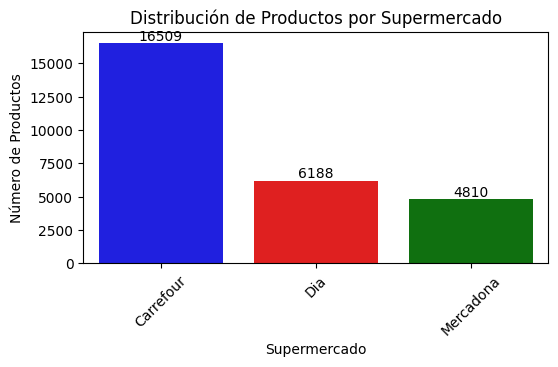

In [ ]:
#CONTEO PRODUCTOS POR SUPERMERCADO

colores_supermercados = {
    'Carrefour': 'blue',
    'Mercadona': 'green',
    'Dia': 'red'
}

#Visión general de los productos que hay en cada supermercado
conteo_supermercados = df['Nombre_Super'].value_counts()

colores = [colores_supermercados[nombre] for nombre in conteo_supermercados.index]

plt.figure(figsize=(6, 3))
sns.barplot(x=conteo_supermercados.index, y=conteo_supermercados.values, palette=colores)

for index, value in enumerate(conteo_supermercados.values):
   plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)


plt.title('Distribución de Productos por Supermercado')
plt.ylabel('Número de Productos')
plt.xlabel('Supermercado')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calcular estadísticas descriptivas por supermercado:
estadisticas_descriptivas = df.groupby('Nombre_Super')[['Precio', 'Precio_Unidad']].describe().round(2)
estadisticas_descriptivas

Precio                                             \
                count  mean   std   min   25%   50%   75%    max   
Nombre_Super                                                       
Carrefour     16509.0  5.70  9.71  0.21  1.99  3.39  5.99  439.0   
Dia            6188.0  3.44  4.37  0.20  1.59  2.45  3.85  129.0   
Mercadona      4810.0  3.62  9.96  0.14  1.49  2.25  3.90  481.5   

             Precio_Unidad                                                   
                     count   mean     std   min   25%   50%    75%      max  
Nombre_Super                                                                 
Carrefour          16509.0  13.72   31.28  0.01  2.82  7.37  15.50  1698.00  
Dia                 6188.0  12.59  138.14  0.01  1.97  5.70  11.73  6875.00  
Mercadona           4810.0   7.13   12.35  0.00  1.95  4.65   8.96   459.46

**Carrefour:**
* Número de productos: 16.509
* Precio medio: 5.70
* Rango de precio: de 0.21 a 439.00

**Dia:**
* Número de productos: 6.188
* Precio medio: 3.44
* Rango de precio: de 0.20 a 129.00

**Mercadona:**
* Número de productos: 4.810
* Precio medio: 3.62
* Rango de precio: de 0.14 a 481.50

In [ ]:
# Calcular estadísticas descriptivas por supermercado por categoria
estadisticas_descriptivas_cat = df.groupby(['Categoria', 'Nombre_Super'])[['Precio', 'Precio_Unidad']].describe().round(2)
estadisticas_descriptivas_cat

Precio                                \
                                        count  mean   std   min   25%   50%   
Categoria                 Nombre_Super                                        
Aceite, especias y salsas Carrefour     602.0  5.43  8.92  0.35  1.99  2.97   
                          Dia           258.0  3.62  5.54  0.35  1.55  1.99   
                          Mercadona     153.0  2.74  5.36  0.35  1.25  1.50   
Agua y refrescos          Carrefour     437.0  2.29  2.64  0.22  0.87  1.59   
                          Dia           258.0  1.61  1.55  0.20  0.79  1.05   
...                                       ...   ...   ...   ...   ...   ...   
Postres y yogures         Dia           227.0  2.02  1.00  0.59  1.35  1.79   
                          Mercadona     149.0  1.76  0.99  0.80  1.25  1.50   
Zumos                     Carrefour     191.0  2.23  1.13  0.60  1.43  1.99   
                          Dia            95.0  1.89  0.69  0.79  1.27  1.85   
                          Mercadona      56.0  1.51  0.67  0.65  1.12  1.38   

                                                    Precio_Unidad         \
                                         75%    max         count   mean   
Categoria                 Nombre_Super                                     
Aceite, especias y salsas Carrefour     4.54  64.50         602.0  24.62   
                          Dia           3.00  46.00         258.0  93.42   
                          Mercadona     2.00  46.00         153.0  15.24   
Agua y refrescos          Carrefour     2.49  20.40         437.0   3.34   
                          Dia           1.85  10.59         258.0   3.06   
...                                      ...    ...           ...    ...   
Postres y yogures         Dia           2.50   5.99         227.0   4.78   
                          Mercadona     2.00   6.10         149.0   3.43   
Zumos                     Carrefour     2.95  10.19         191.0   2.98   
                          Dia           2.47   3.79          95.0   1.92   
                          Mercadona     1.71   4.99          56.0   1.84   

                                                                          \
                                           std   min   25%    50%    75%   
Categoria                 Nombre_Super                                     
Aceite, especias y salsas Carrefour      68.40  0.35  6.03  10.55  20.23   
                          Dia           667.52  0.35  5.15   9.40  20.82   
                          Mercadona      50.74  0.35  4.17   6.60  11.05   
Agua y refrescos          Carrefour       6.96  0.13  1.03   2.12   3.40   
                          Dia             4.57  0.13  0.96   1.84   3.00   
...                                        ...   ...   ...    ...    ...   
Postres y yogures         Dia             2.78  1.35  2.58   4.80   6.34   
                          Mercadona       1.89  1.30  2.08   2.94   4.17   
Zumos                     Carrefour       2.78  0.60  1.53   2.38   3.07   
                          Dia             0.81  0.77  1.30   1.85   2.47   
                          Mercadona       1.57  0.62  1.00   1.25   1.75   

                                                 
                                            max  
Categoria                 Nombre_Super           
Aceite, especias y salsas Carrefour     1419.00  
                          Dia           6875.00  
                          Mercadona      459.46  
Agua y refrescos          Carrefour       93.00  
                          Dia             27.67  
...                                         ...  
Postres y yogures         Dia             23.65  
                          Mercadona       11.11  
Zumos                     Carrefour       16.98  
                          Dia              5.15  
                          Mercadona        7.96  

[79 rows x 16 columns]

In [ ]:
# Producto más caro y  más barato de cada supermercado:

# Encontrar índices de los productos más caros y más baratos
idx_max_precio = df.groupby('Nombre_Super')['Precio'].idxmax()
idx_min_precio = df.groupby('Nombre_Super')['Precio'].idxmin()

# Obtener información de los productos más caros y más baratos
productos_mas_caros = df.loc[idx_max_precio, ['Nombre_Super', 'Producto', 'Precio']]
productos_mas_baratos = df.loc[idx_min_precio, ['Nombre_Super', 'Producto', 'Precio']]

In [ ]:
#PRODUCTOS MÁS CAROS
productos_mas_caros

,Nombre_Super,Producto,Precio
1495,Carrefour,Jamón de Bellota Ibérico 100% Raza Ibérica Sán...,439.0
23277,Dia,Jamón de cebo ibérico 50% Manuel de Montejo 8 Kg,129.0
17127,Mercadona,Jamón bellota ibérico 100% Covap,481.5


In [ ]:
#PRODUCTOS MÁS BARATOS
productos_mas_baratos

,Nombre_Super,Producto,Precio
12264,Carrefour,Baguetina Enharinada 1 ud.,0.21
21322,Dia,Agua mineral natural Dia botella 50 cl,0.20
21320,Mercadona,Pasta bañada Hacendado,0.14


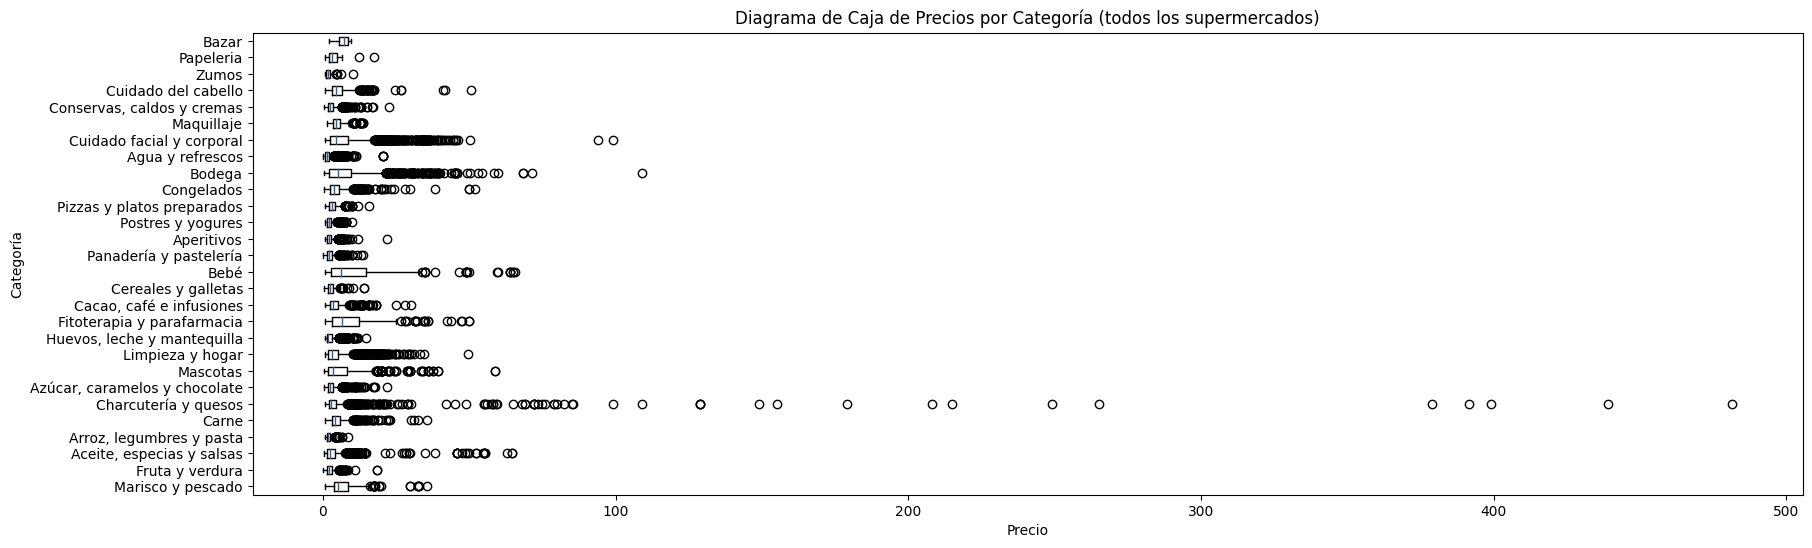

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Crear el diagrama de caja para cada categoría
plt.boxplot([df[df['Categoria'] == categoria]['Precio'] for categoria in df['Categoria'].unique()],
            labels=df['Categoria'].unique(), vert=False)

plt.title('Diagrama de Caja de Precios por Categoría (todos los supermercados)')
plt.xlabel('Precio')
plt.ylabel('Categoría')

plt.show()

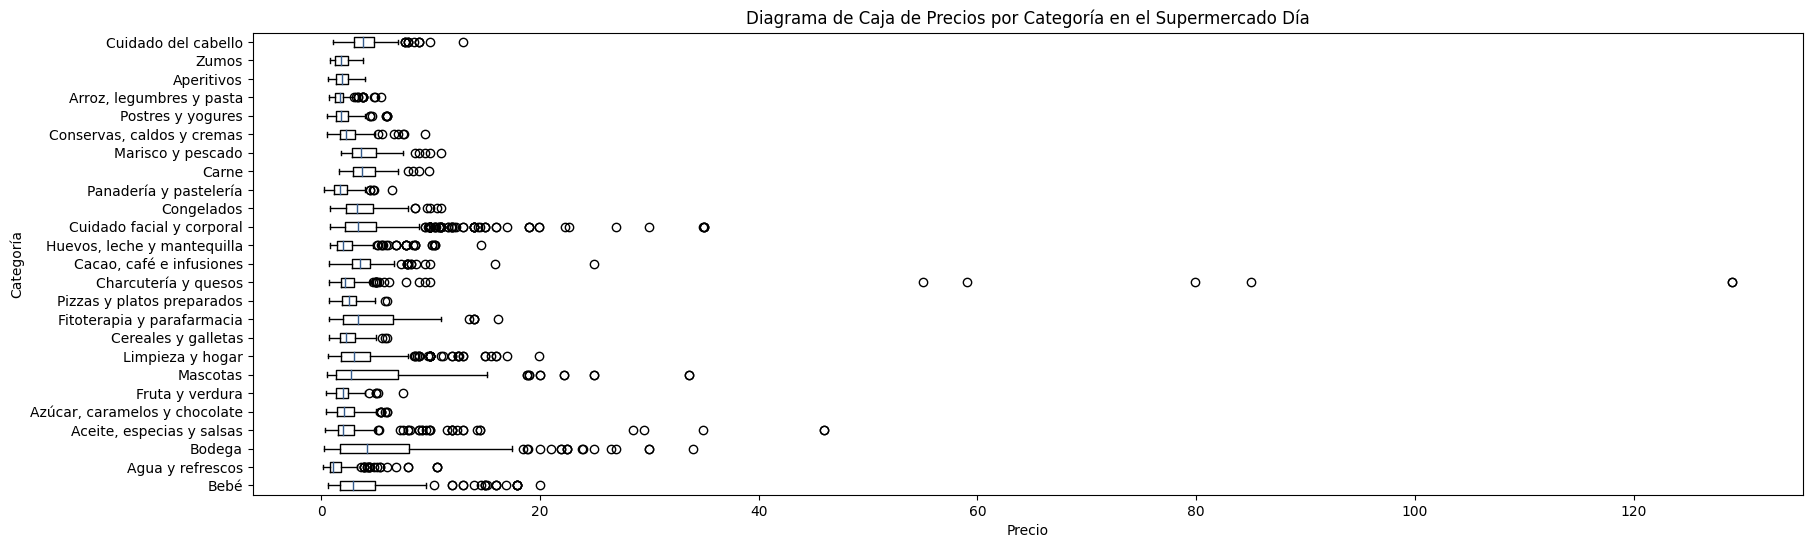

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que la columna que contiene la información del supermercado se llama 'Supermercado'
supermercado_dia = 'Dia'
df_supermercado_dia = df[df['Nombre_Super'] == supermercado_dia]

plt.figure(figsize=(20, 6))

# Crear el diagrama de caja para cada categoría en el supermercado Día
plt.boxplot([df_supermercado_dia[df_supermercado_dia['Categoria'] == categoria]['Precio'] for categoria in df_supermercado_dia['Categoria'].unique()],
            labels=df_supermercado_dia['Categoria'].unique(), vert=False)

plt.title('Diagrama de Caja de Precios por Categoría en el Supermercado Día')
plt.xlabel('Precio')
plt.ylabel('Categoría')

plt.show()

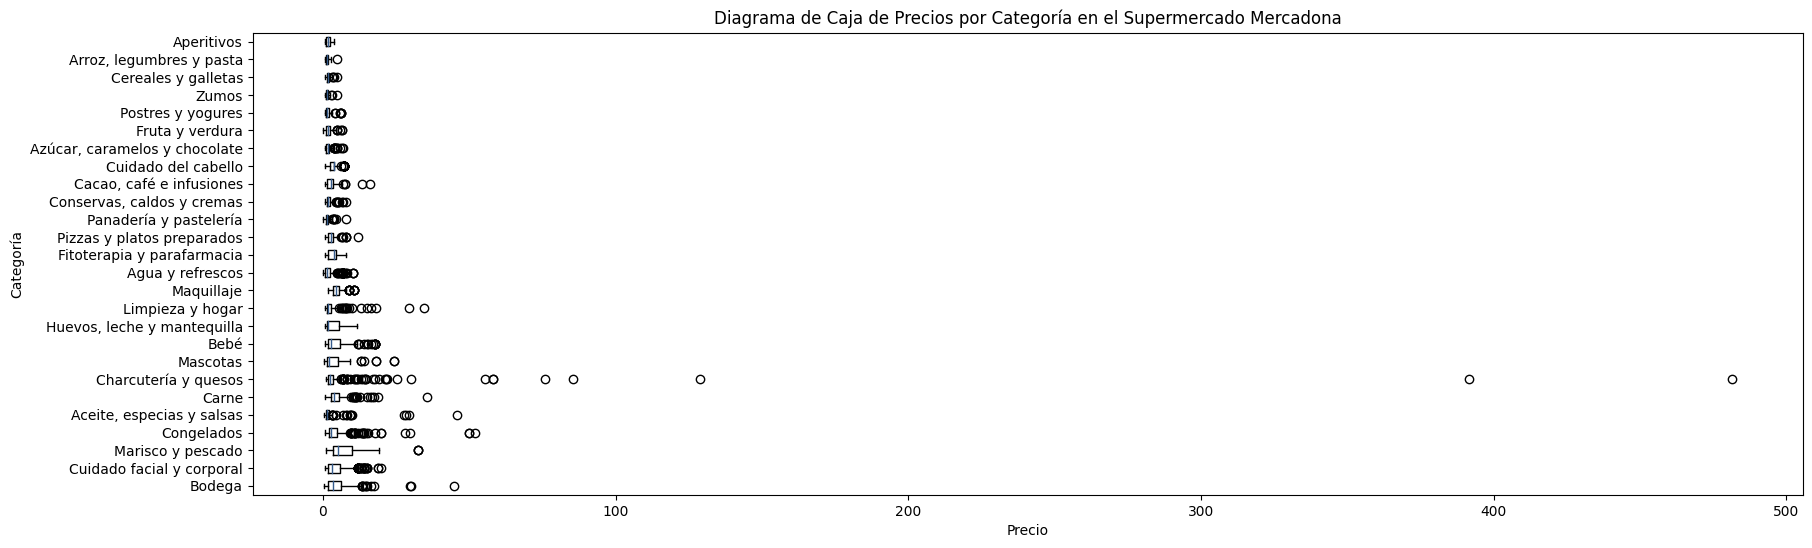

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que la columna que contiene la información del supermercado se llama 'Supermercado'
supermercado = 'Mercadona'
df_supermercado = df[df['Nombre_Super'] == supermercado]

plt.figure(figsize=(20, 6))

# Crear el diagrama de caja para cada categoría en el supermercado Día
plt.boxplot([df_supermercado[df_supermercado['Categoria'] == categoria]['Precio'] for categoria in df_supermercado['Categoria'].unique()],
            labels=df_supermercado['Categoria'].unique(), vert=False)

plt.title('Diagrama de Caja de Precios por Categoría en el Supermercado Mercadona')
plt.xlabel('Precio')
plt.ylabel('Categoría')

plt.show()

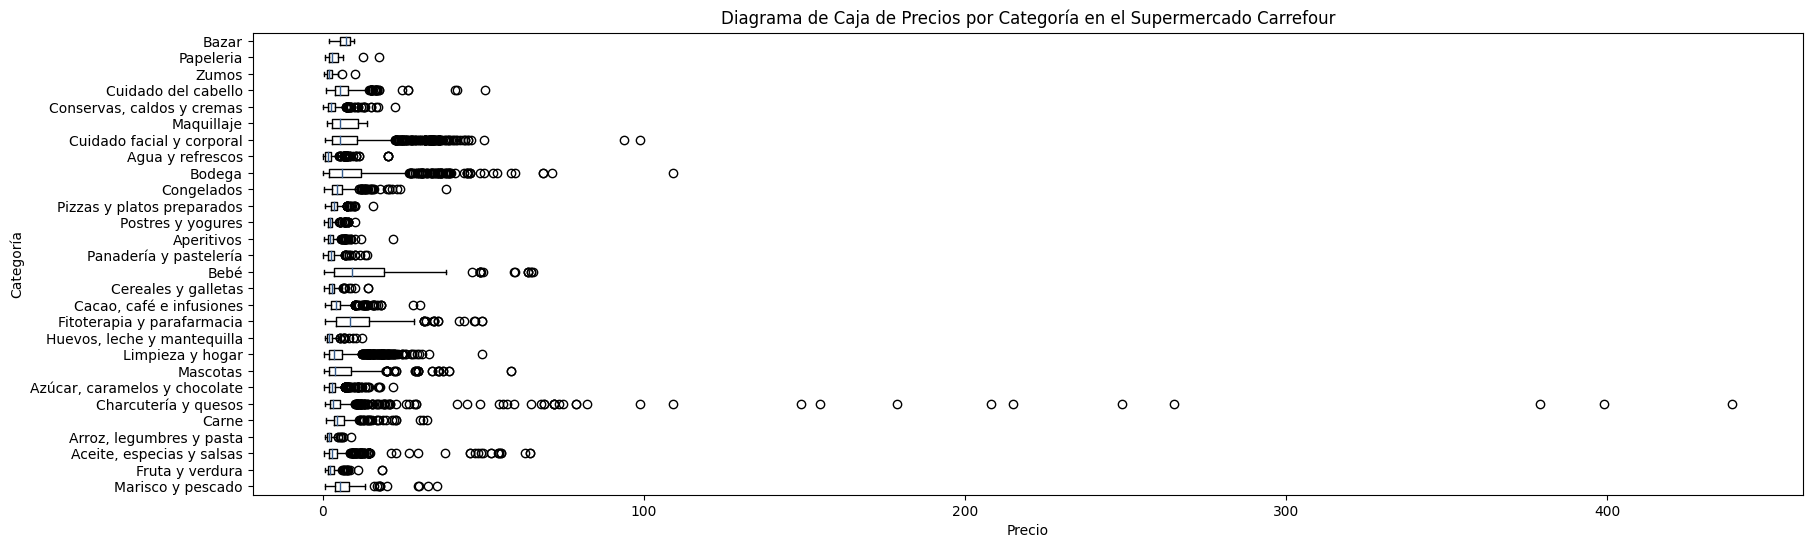

In [ ]:
# Suponiendo que la columna que contiene la información del supermercado se llama 'Supermercado'
supermercado = 'Carrefour'
df_supermercadoC = df[df['Nombre_Super'] == supermercado]

plt.figure(figsize=(20, 6))

# Crear el diagrama de caja para cada categoría en el supermercado Día
plt.boxplot([df_supermercadoC[df_supermercadoC['Categoria'] == categoria]['Precio'] for categoria in df_supermercadoC['Categoria'].unique()],
            labels=df_supermercadoC['Categoria'].unique(), vert=False)

plt.title('Diagrama de Caja de Precios por Categoría en el Supermercado Carrefour')
plt.xlabel('Precio')
plt.ylabel('Categoría')

plt.show()

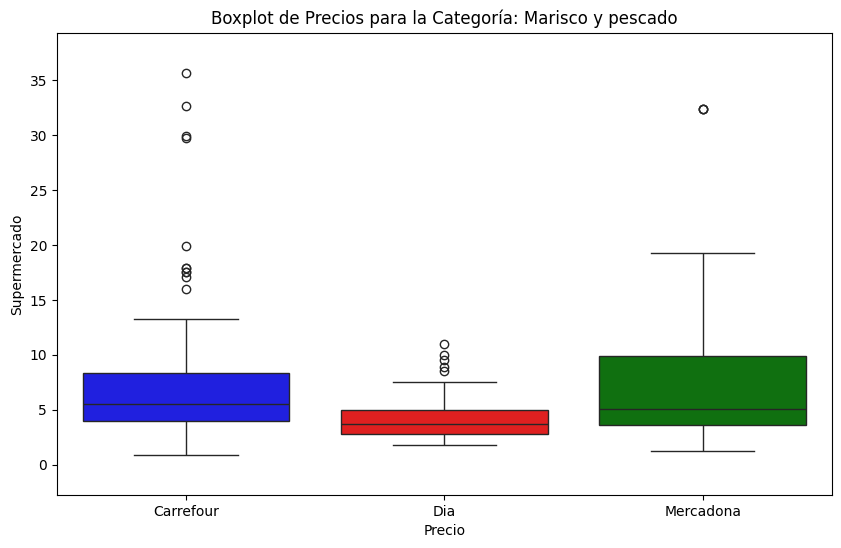

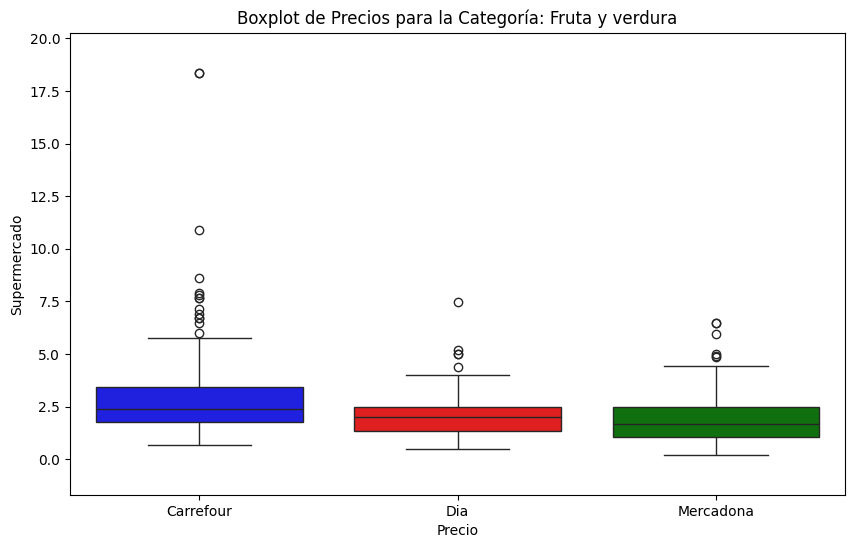

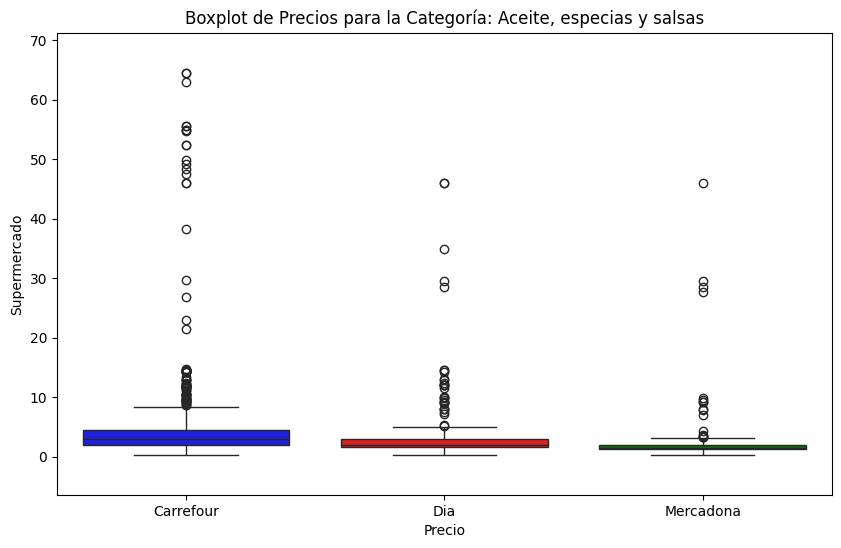

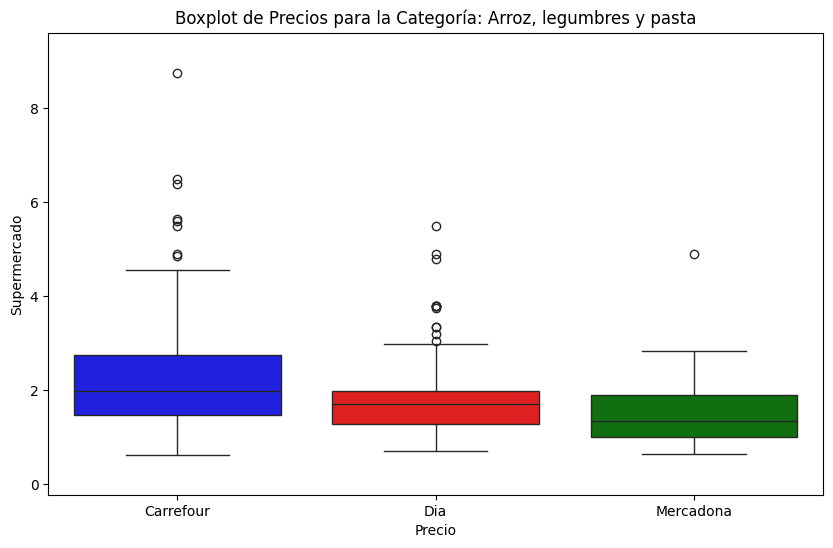

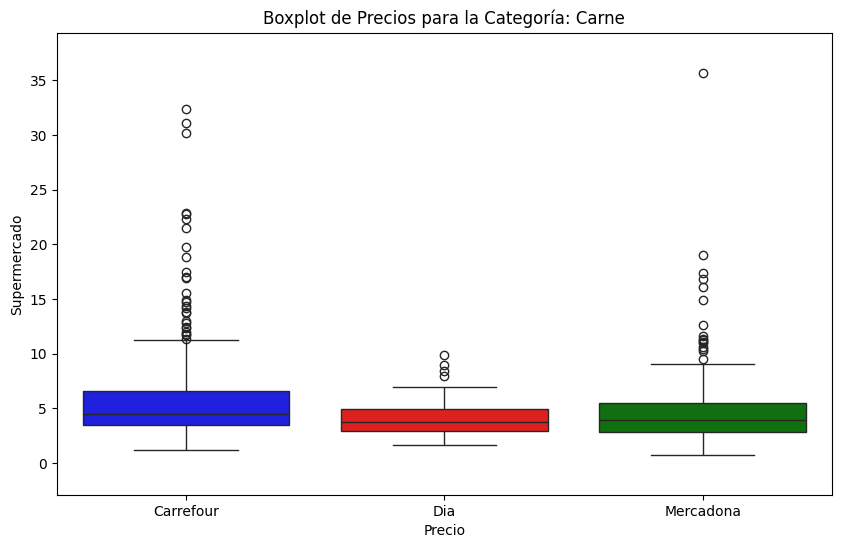

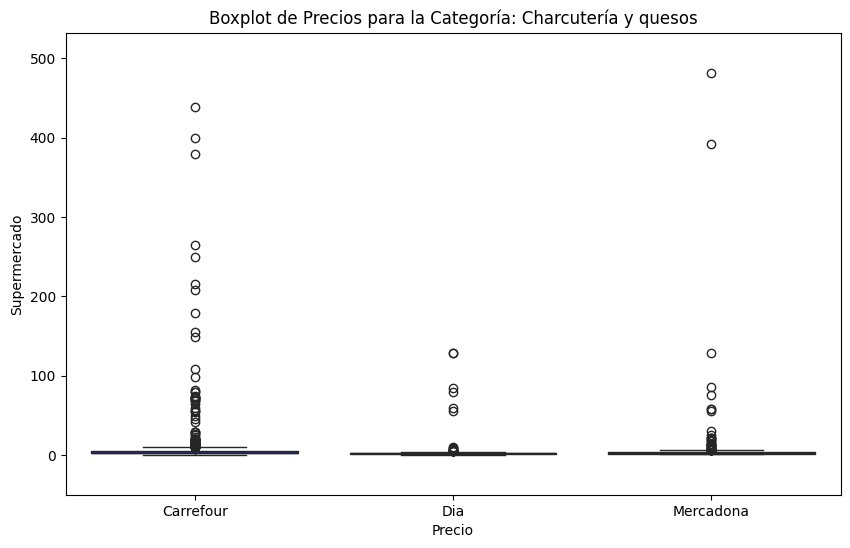

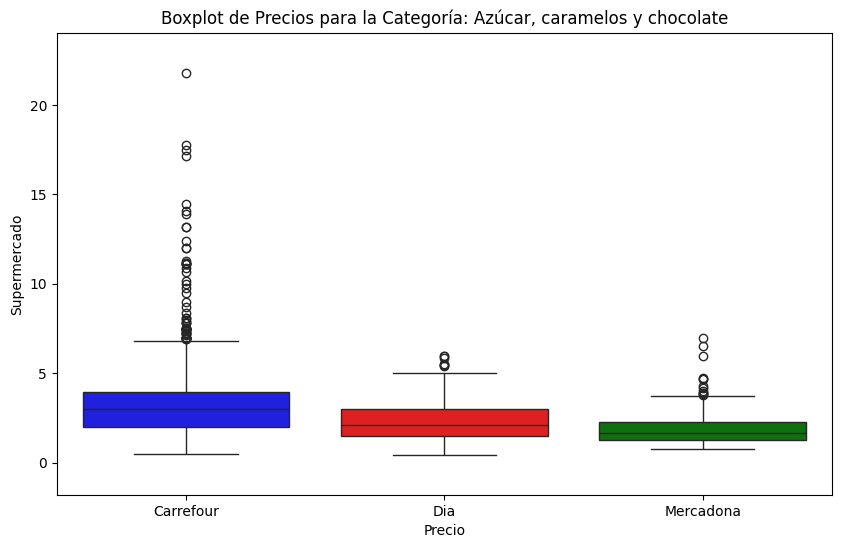

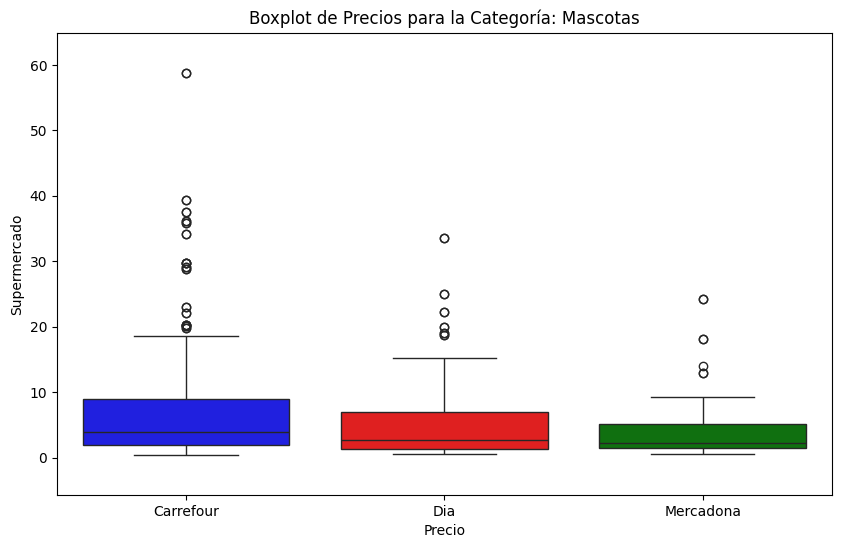

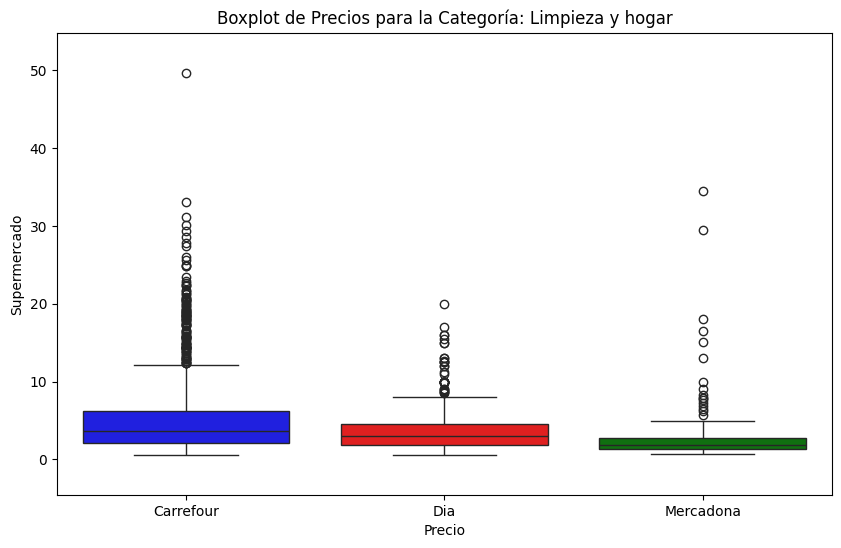

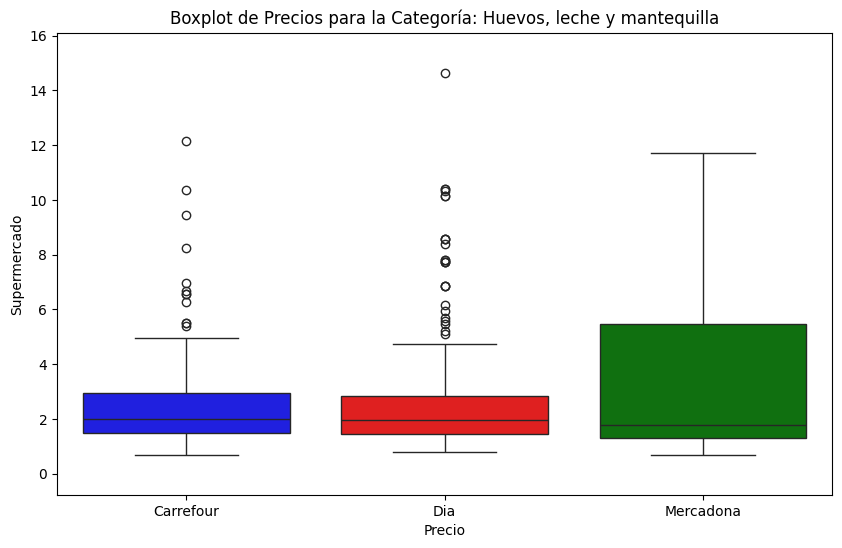

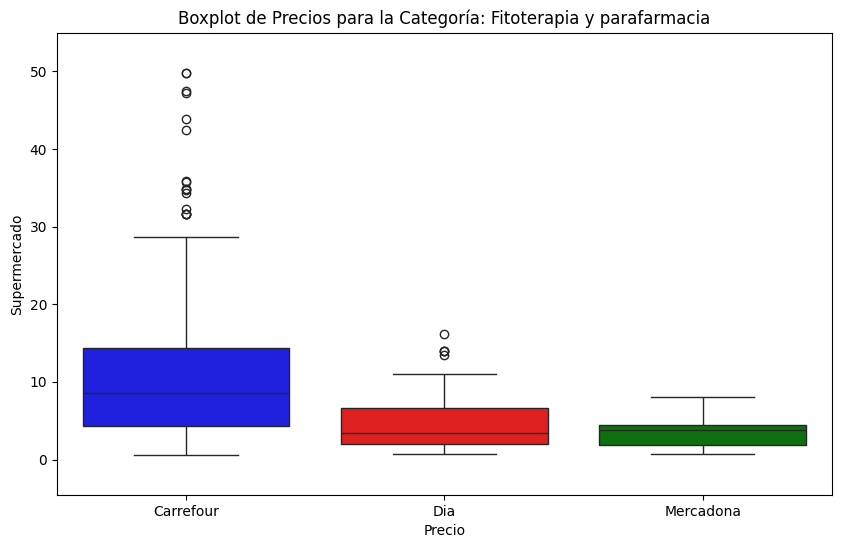

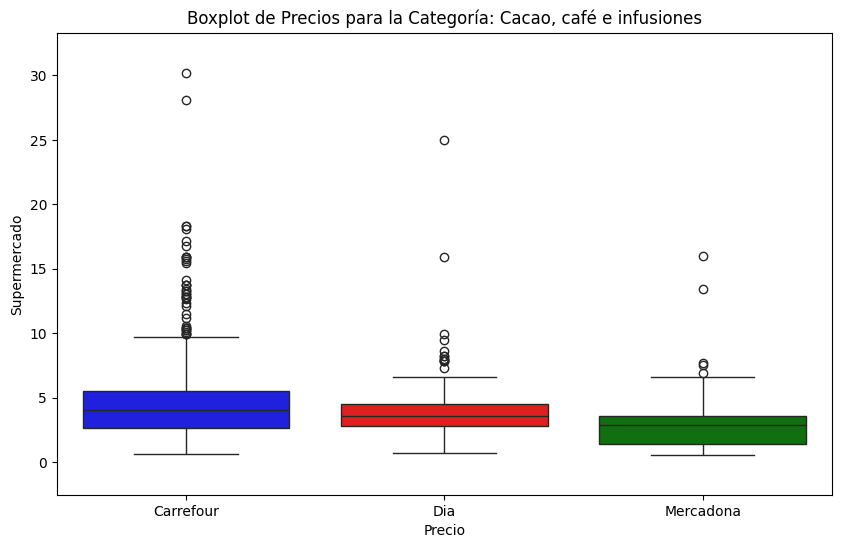

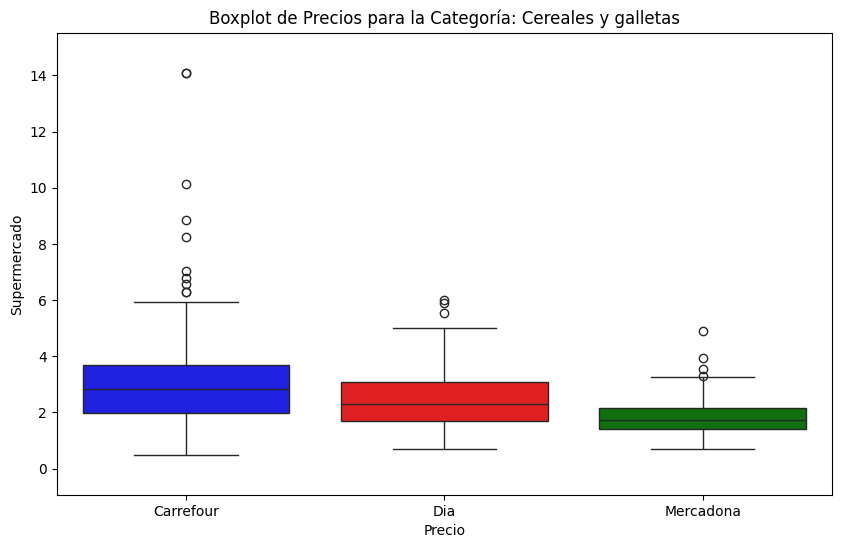

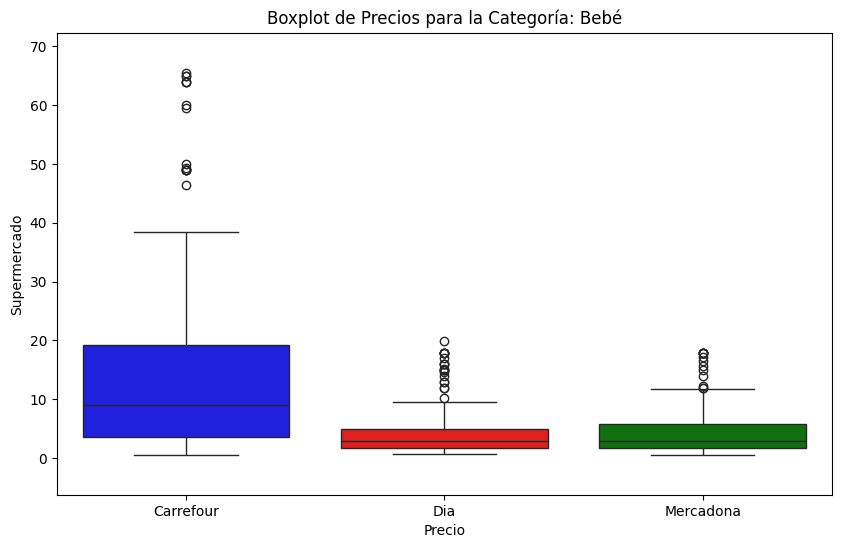

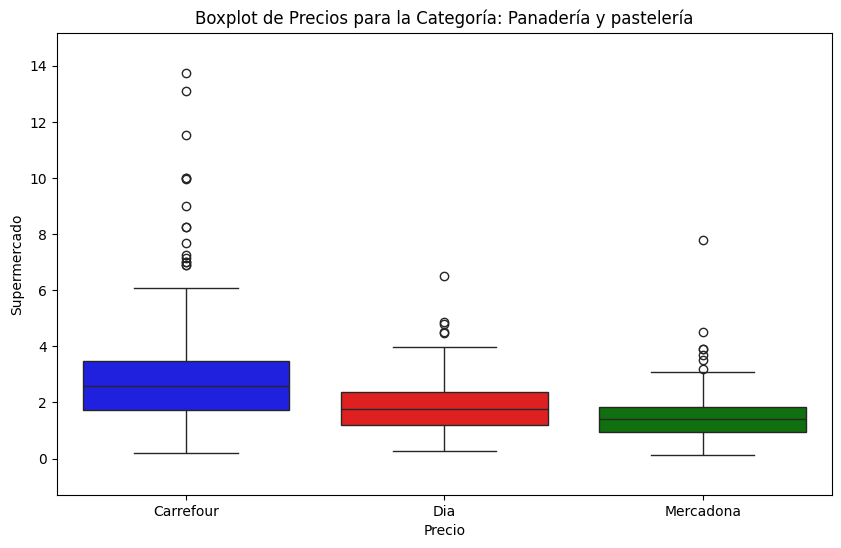

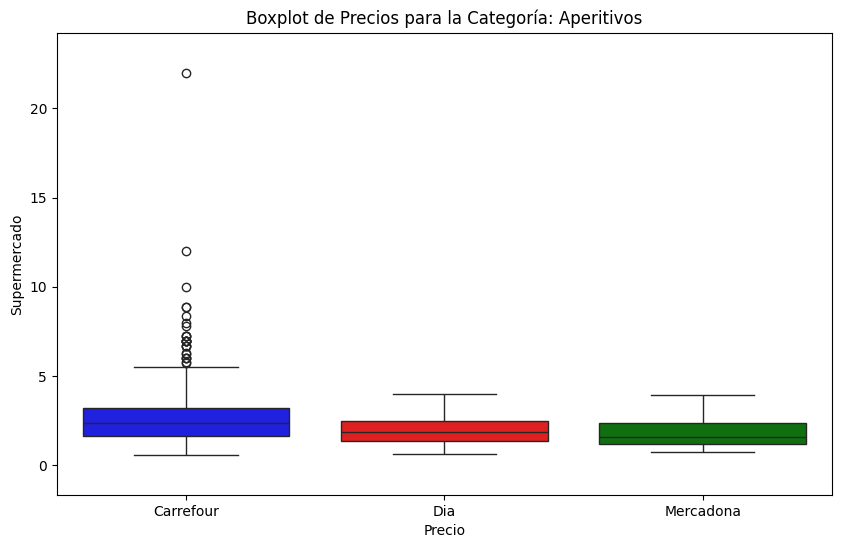

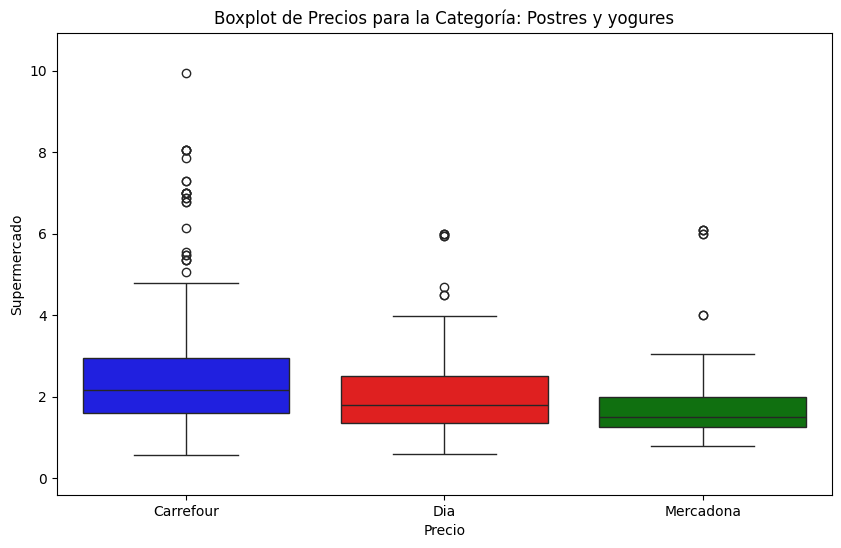

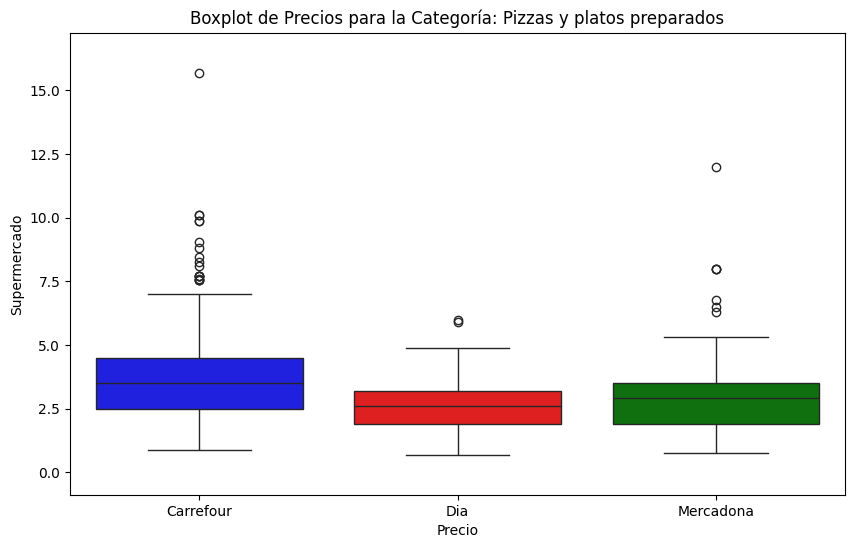

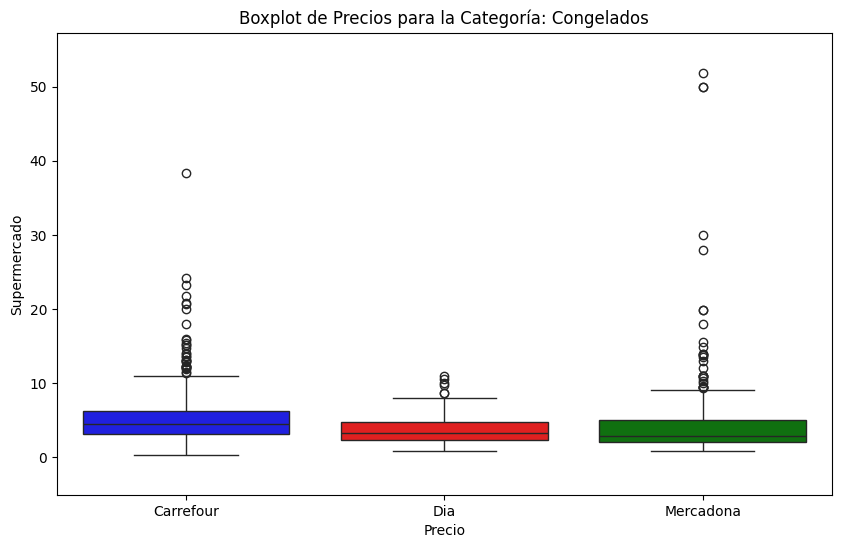

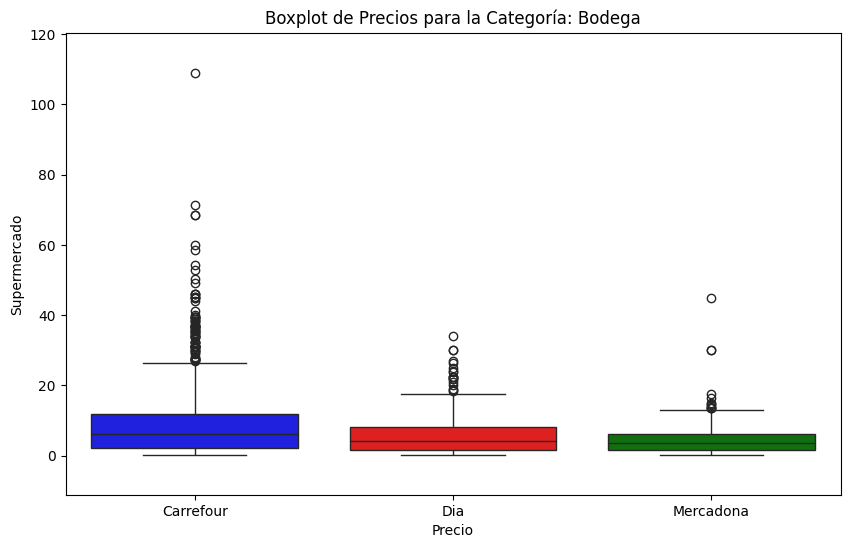

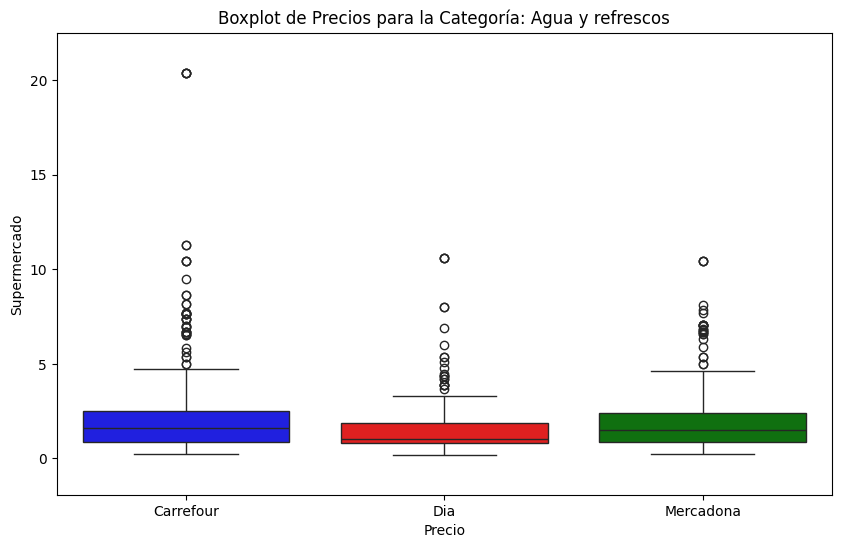

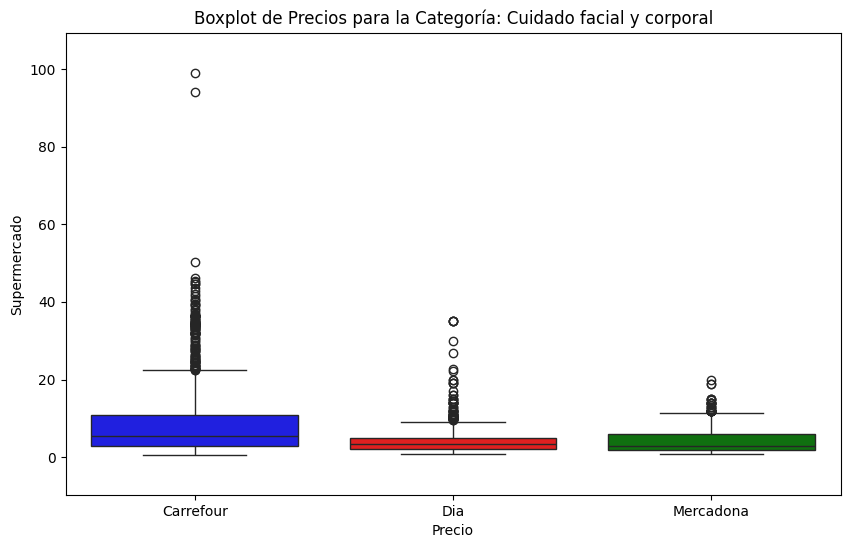

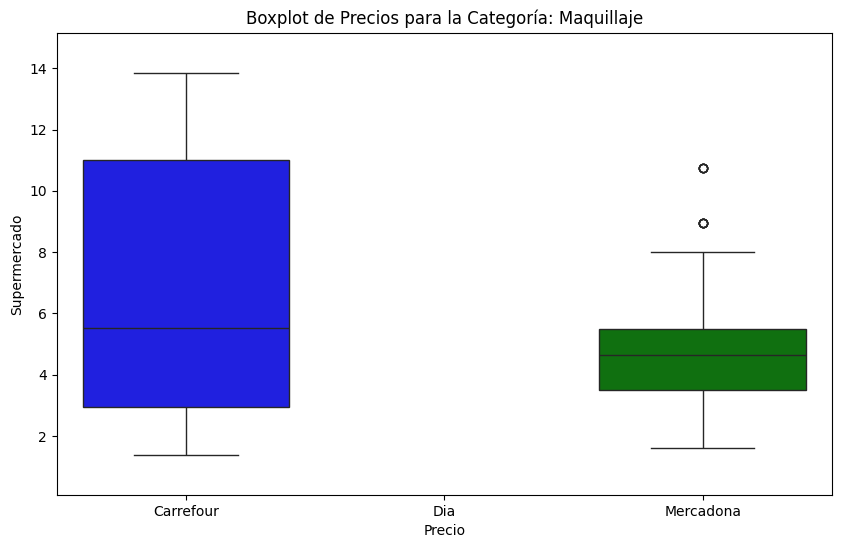

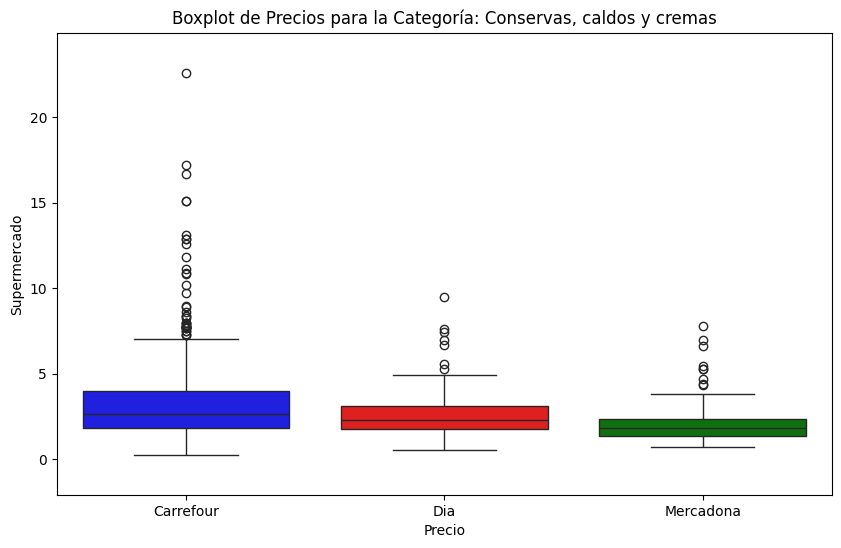

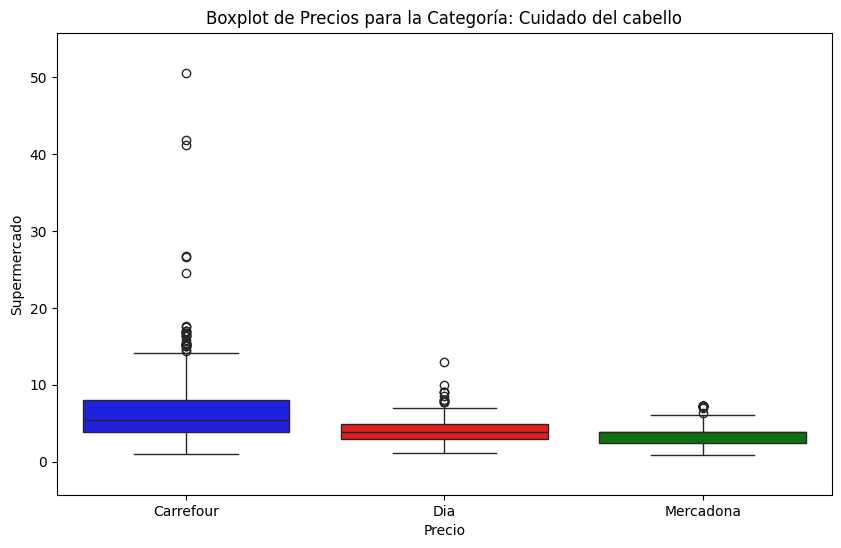

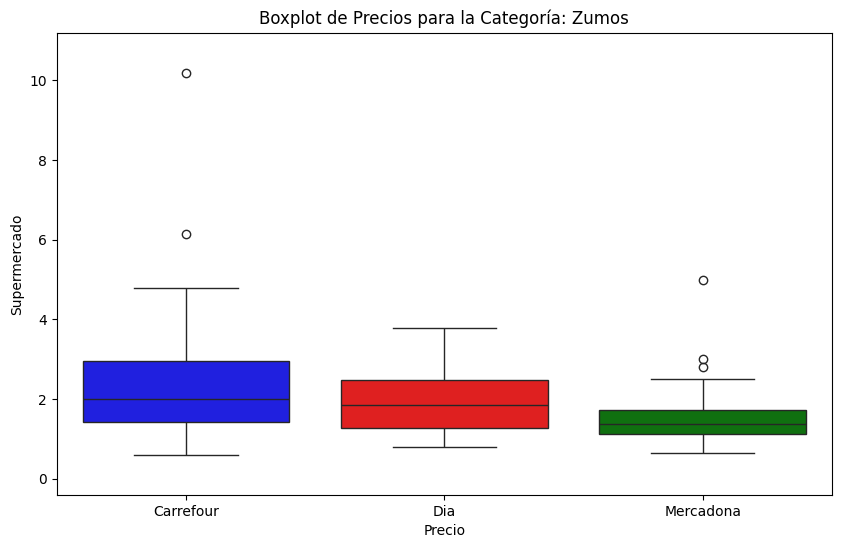

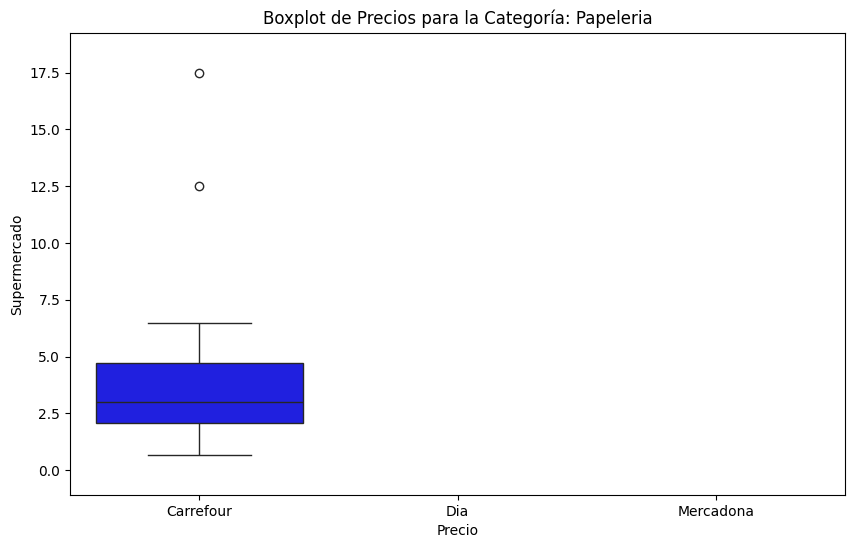

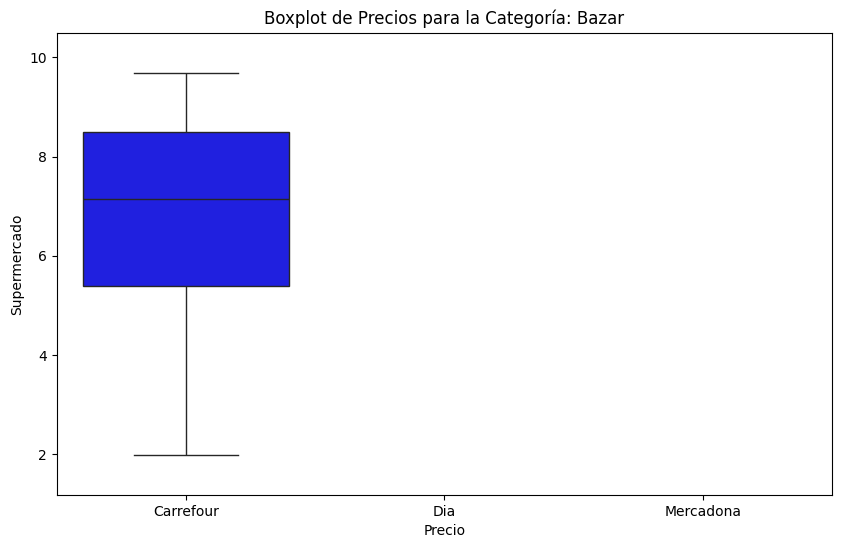

In [ ]:
# Obtener la lista de categorías únicas
categorias_unicas = df['Categoria'].unique()

# Definir el diccionario de colores para cada supermercado
diccionario_colores = {'Dia': 'red', 'Mercadona': 'green', 'Carrefour': 'blue'}

# Crear un boxplot para cada categoría
for categoria in categorias_unicas:
    plt.figure(figsize=(10, 6))
    ax=sns.boxplot(data=df[df['Categoria'] == categoria], x='Nombre_Super',
                y='Precio', palette=diccionario_colores)
    ax.set_title(f'Boxplot de Precios para la Categoría: {categoria}')
    ax.set_xlabel('Precio')
    ax.set_ylabel('Supermercado')
    # Obtener los límites del eje y automáticamente
    ylim = ax.get_ylim()
    # Ajustar los límites del eje y con un pequeño margen
    ax.set_ylim(ylim[0] - 0.05 * (ylim[1] - ylim[0]), ylim[1] + 0.05 * (ylim[1] - ylim[0]))

##ANÁLISIS MARCA BLANCA

In [ ]:
# Conteo marca blanca vs. otra por supermercado
conteo_marcas_supermercado = df.groupby(['Nombre_Super', 'Marca']).size().unstack(fill_value=0)

conteo_marcas_supermercado

Marca,Blanca,Otra
Nombre_Super,,
Carrefour,4333,12176
Dia,1674,4514
Mercadona,3416,1394


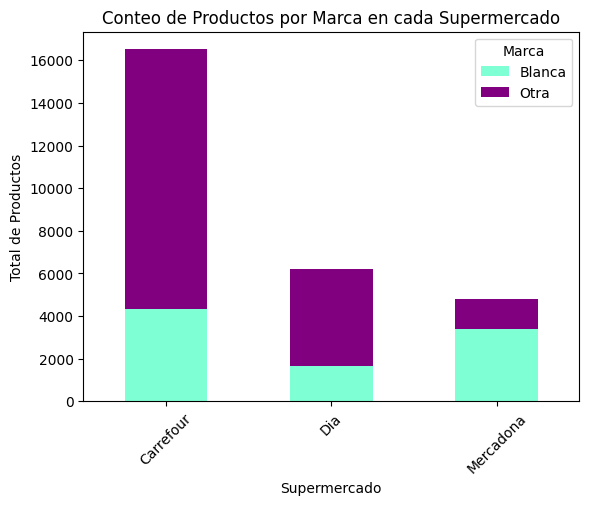

In [ ]:
# Crear un gráfico de barras para mostrar el conteo de la columna "Marca" por valores y por supermercado,
# utilizando color aguamarina para 'Blanca' y color morado para 'Otra'.

conteo_marcas_supermercado.plot(kind='bar', color={'Blanca': 'aquamarine', 'Otra': 'purple'}, stacked=True)
plt.title('Conteo de Productos por Marca en cada Supermercado')
plt.xlabel('Supermercado')
plt.ylabel('Total de Productos')
plt.xticks(rotation=45)
plt.legend(title='Marca')
plt.show()

Vemos como en Mercadona la proporción de su marca blanca vs. otras marcas es bastante superior. Lo vemos en porcentaje:

In [ ]:
# Para calcular el porcentaje de productos de marca blanca versus el total de productos por supermercado,
# primero sumaremos las cantidades de 'Blanca' y 'Otra' para obtener el total de productos por supermercado.
# Luego, calcularemos el porcentaje de 'Blanca' sobre este total.

# Calcular el total de productos por supermercado
total_productos_supermercado = conteo_marcas_supermercado.sum(axis=1)

# Calcular el porcentaje de 'Blanca'
porcentaje_blanca = (conteo_marcas_supermercado['Blanca'] / total_productos_supermercado) * 100

porcentaje_blanca.round(2)

Nombre_Super
Carrefour    26.25
Dia          27.05
Mercadona    71.02
dtype: float64

##ANÁLISIS CATEGORÍAS

In [ ]:
# Calcular el número de productos por categoría de cada supermercado usando el DataFrame limpio
productos_por_categoria = df.groupby(['Nombre_Super', 'Categoria']).size().unstack(fill_value=0)

# Transponer el DataFrame para tener supermercados en las columnas y categorías en las filas
productos_por_categoria_transpuesto = productos_por_categoria.transpose()

# Mostrar el resultado transpuesto
productos_por_categoria_transpuesto

Nombre_Super,Carrefour,Dia,Mercadona
Categoria,,,
"Aceite, especias y salsas",602,258,153
Agua y refrescos,437,258,184
Aperitivos,604,222,161
"Arroz, legumbres y pasta",341,139,98
"Azúcar, caramelos y chocolate",783,473,176
Bazar,15,0,0
Bebé,609,151,105
Bodega,1428,464,260
"Cacao, café e infusiones",534,170,124


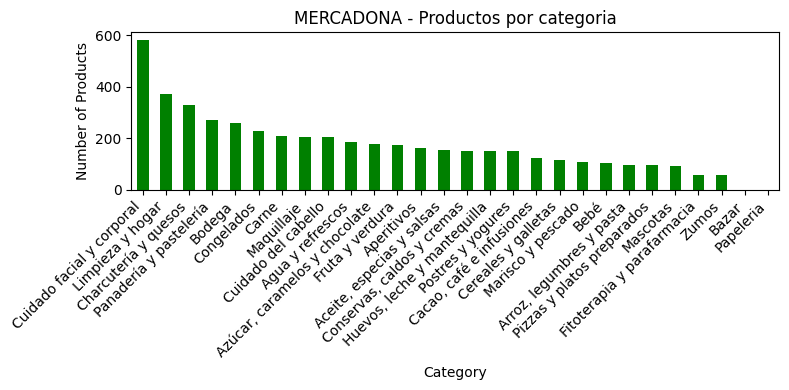

In [ ]:
#PRODUCTOS POR CATEGORÍA EN MERCADONA
df_mercadona = df[df['Nombre_Super'] == 'Mercadona']

# Cuenta de productos por categoría en Mercadona
cuenta_categorias_mercadona = df_mercadona['Categoria'].value_counts()

# Gráfico
plt.figure(figsize=(8, 4), facecolor='white')
cuenta_categorias_mercadona.plot(kind='bar', color='green')
plt.title('MERCADONA - Productos por categoria')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

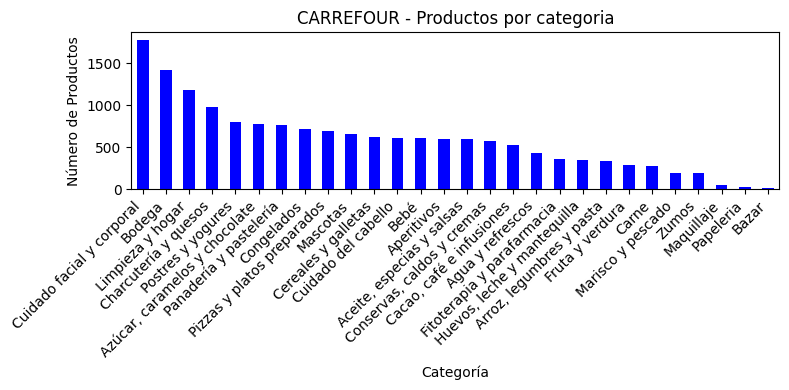

In [ ]:
# Filtrar el DataFrame para obtener solo los productos de Carrefour
df_carrefour = df[df['Nombre_Super'] == 'Carrefour']

# Cuenta de productos por categoría en Carrefour
cuenta_categorias_carrefour = df_carrefour['Categoria'].value_counts()

# Gráfico
plt.figure(figsize=(8, 4), facecolor='white')
cuenta_categorias_carrefour.plot(kind='bar', color='blue')
plt.title('CARREFOUR - Productos por categoria')
plt.xlabel('Categoría')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

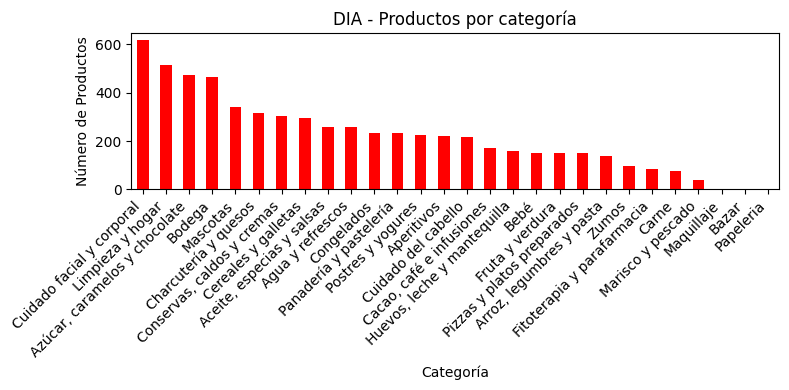

In [ ]:
# Filtrar el DataFrame para obtener solo los productos de Dia
df_dia = df[df['Nombre_Super'] == 'Dia']

# Cuenta de productos por categoría en Dia
cuenta_categorias_dia = df_dia['Categoria'].value_counts()

# Gráfico
plt.figure(figsize=(8, 4), facecolor='white')
cuenta_categorias_dia.plot(kind='bar', color='red')
plt.title('DIA - Productos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calcular el precio medio por categoría para cada supermercado
precio_medio_por_categoria = df.groupby(['Nombre_Super', 'Categoria'])['Precio'].mean().reset_index().round(2)

# Pivotar el dataframe para tener supermercados como columnas y categorías como filas
precio_medio_por_categoria_pivot = precio_medio_por_categoria.pivot(index='Categoria', columns='Nombre_Super', values='Precio')

precio_medio_por_categoria_pivot

Nombre_Super,Carrefour,Dia,Mercadona
Categoria,,,
"Aceite, especias y salsas",5.43,3.62,2.74
Agua y refrescos,2.29,1.61,2.25
Aperitivos,2.71,1.92,1.79
"Arroz, legumbres y pasta",2.23,1.83,1.49
"Azúcar, caramelos y chocolate",3.46,2.32,1.98
Bazar,6.61,NaN,NaN
Bebé,12.54,4.75,5.04
Bodega,8.96,5.84,4.77
"Cacao, café e infusiones",4.79,4.01,3.03


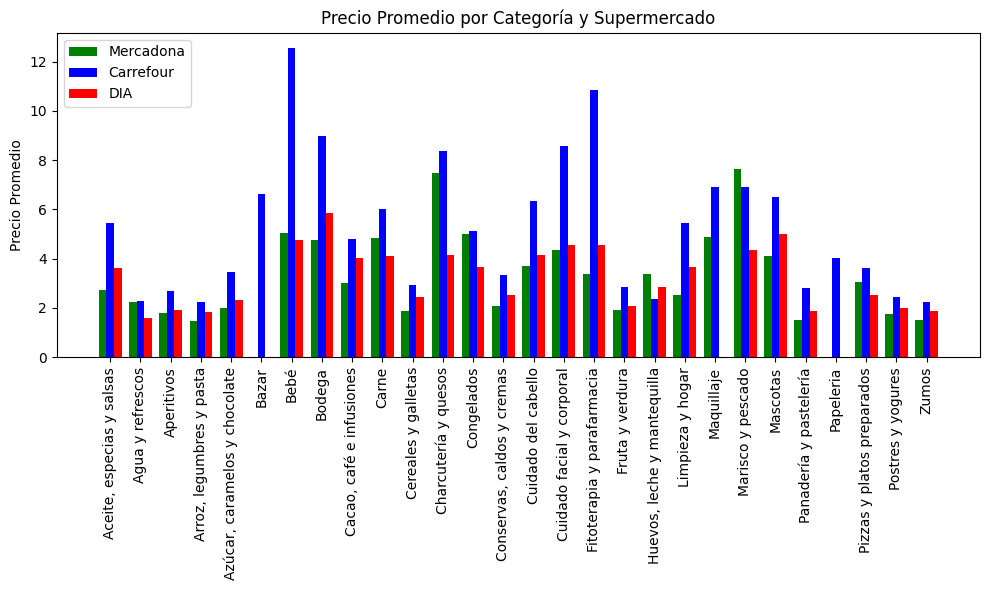

In [ ]:
# PRECIO MEDIO POR CATEGORÍA POR SUPERMERCADO:

categorias = precio_medio_por_categoria_pivot.index
mercados = precio_medio_por_categoria_pivot.columns
valores = precio_medio_por_categoria_pivot.values

plt.figure(figsize=(10, 6))

n_categorias = len(categorias)
indice_barras = np.arange(n_categorias)

ancho = 0.25

plt.bar(indice_barras, precio_medio_por_categoria_pivot['Mercadona'], color='green', width=ancho, label='Mercadona')
plt.bar(indice_barras + ancho, precio_medio_por_categoria_pivot['Carrefour'], color='blue', width=ancho, label='Carrefour')
plt.bar(indice_barras + 2*ancho, precio_medio_por_categoria_pivot['Dia'], color='red', width=ancho, label='DIA')

plt.title('Precio Promedio por Categoría y Supermercado')
plt.xticks(indice_barras + ancho, categorias, rotation=90)
plt.ylabel('Precio Promedio')

plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calcular la diferencia de precios medios por categoría entre Mercadona y Carrefour
diferencia_mercadona_carrefour = precio_medio_por_categoria_pivot['Mercadona'] - precio_medio_por_categoria_pivot['Carrefour']

# Calcular la diferencia de precios medios por categoría entre Mercadona y DIA
diferencia_mercadona_dia = precio_medio_por_categoria_pivot['Mercadona'] - precio_medio_por_categoria_pivot['Dia']

# Crear dataframes para las diferencias calculadas para mejor visualización
df_diferencia_mercadona_carrefour = diferencia_mercadona_carrefour.to_frame(name='Diferencia Mercadona - Carrefour')
df_diferencia_mercadona_dia = diferencia_mercadona_dia.to_frame(name='Diferencia Mercadona - DIA')

In [ ]:
#Mostramos diferencias de precios medios por categoria entre MERCADONA - CARREFOUR
df_diferencia_mercadona_carrefour

,Diferencia Mercadona - Carrefour
Categoria,
"Aceite, especias y salsas",-2.69
Agua y refrescos,-0.04
Aperitivos,-0.92
"Arroz, legumbres y pasta",-0.74
"Azúcar, caramelos y chocolate",-1.48
Bazar,NaN
Bebé,-7.50
Bodega,-4.19
"Cacao, café e infusiones",-1.76


In [ ]:
#Mostramos diferencias de precios medios por categoria entre MERCADONA - DIA
df_diferencia_mercadona_dia

,Diferencia Mercadona - DIA
Categoria,
"Aceite, especias y salsas",-0.88
Agua y refrescos,0.64
Aperitivos,-0.13
"Arroz, legumbres y pasta",-0.34
"Azúcar, caramelos y chocolate",-0.34
Bazar,NaN
Bebé,0.29
Bodega,-1.07
"Cacao, café e infusiones",-0.98


In [ ]:
#Mostramos las categorías donde, según los datos, Carrefour es MÁS BARATO que Mercadona
#en la mayoria de categorías Mercadona es más barato, por eso analizamos la excepción
categorias_mas_baratas_carrefour = df_diferencia_mercadona_carrefour[df_diferencia_mercadona_carrefour['Diferencia Mercadona - Carrefour'] > 0].index.tolist()
categorias_mas_baratas_carrefour

['Huevos, leche y mantequilla', 'Marisco y pescado']

In [ ]:
# Categorías donde Mercadona es más caro que DIA
categorias_mas_baratas_dia = df_diferencia_mercadona_dia[df_diferencia_mercadona_dia['Diferencia Mercadona - DIA'] > 0].index.tolist()
categorias_mas_baratas_dia

['Agua y refrescos',
 'Bebé',
 'Carne',
 'Charcutería y quesos',
 'Congelados',
 'Huevos, leche y mantequilla',
 'Marisco y pescado',
 'Pizzas y platos preparados']

## ANÁLISIS INVERSIÓN

In [ ]:
precios_promedio = df.groupby(['Id_supermercado', 'Categoria'])['Precio'].mean().unstack(fill_value=0)

In [ ]:
s1_precio = precios_promedio.loc['S1']
s2_precio = precios_promedio.loc['S2']
s3_precio = precios_promedio.loc['S3']

In [ ]:
s2_precio = s2_precio.replace(0, np.inf) # Reemplaza 0 con infinito para usar mínimo con s3
s3_precio = s3_precio.replace(0, np.inf) # Reemplaza 0 con infinito para usar mínimo con s2
diferencia = s1_precio - np.minimum(s2_precio, s3_precio)
diferencia_positiva = diferencia[diferencia > 0]

In [ ]:
productos_mercadona = df[df['Id_supermercado'] == 'S1'].groupby('Categoria').size()

In [ ]:
inversion_ajustada = diferencia_positiva * productos_mercadona
inversion_total = inversion_ajustada.sum()

In [ ]:
inversion_categoria_df = pd.DataFrame({'Inversion_por_categoria': inversion_ajustada})

In [ ]:
# Calcular la inversión ajustada y redondear a dos decimales
inversion_ajustada = (diferencia_positiva * productos_mercadona).round(2)

# Ordenar los valores de mayor a menor
inversion_ajustada_ordenada = inversion_ajustada.sort_values(ascending=False)

# Calcular la inversión total y redondear a dos decimales
inversion_total = inversion_ajustada_ordenada.sum().round(2)

# Crear un DataFrame con los resultados y ordenar de mayor a menor
inversion_categoria_df = pd.DataFrame({'Inversion_por_categoria': inversion_ajustada_ordenada})

# Mostrar el DataFrame ordenado y la inversión total
inversion_categoria_df, inversion_total

(                               Inversion_por_categoria
 Categoria                                             
 Charcutería y quesos                           1091.82
 Marisco y pescado                               349.57
 Congelados                                      308.70
 Huevos, leche y mantequilla                     151.79
 Carne                                           151.63
 Agua y refrescos                                117.18
 Pizzas y platos preparados                       51.68
 Bebé                                             29.92
 Aceite, especias y salsas                          NaN
 Aperitivos                                         NaN
 Arroz, legumbres y pasta                           NaN
 Azúcar, caramelos y chocolate                      NaN
 Bazar                                              NaN
 Bodega                                             NaN
 Cacao, café e infusiones                           NaN
 Cereales y galletas                            

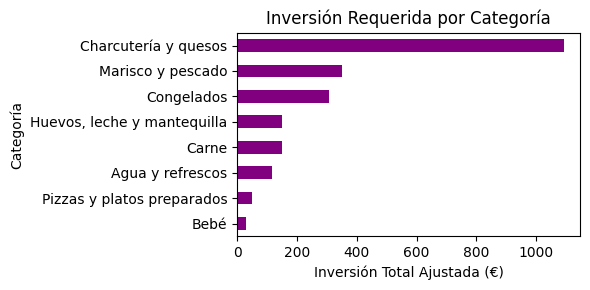

In [ ]:
import matplotlib.pyplot as plt

# Asegurándonos de que solo estamos trabajando con las categorías que requieren inversión
inversion_requerida = inversion_ajustada_sorted[inversion_ajustada_sorted > 0]

plt.figure(figsize=(6, 3))
# Usamos 'barh' para un gráfico horizontal y especificamos el color
inversion_requerida.plot(kind='barh', color='purple')  # 'purple' para un color lila
plt.title('Inversión Requerida por Categoría')
plt.xlabel('Inversión Total Ajustada (€)')
plt.ylabel('Categoría')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar el valor más alto en la parte superior
plt.tight_layout()
plt.show()


Este gráfico de barras horizontal, titulado "Inversión Requerida por Categoría", presenta una comparativa visual de la inversión que se necesita hacer en distintas categorías de productos para igualar los precios de Mercadona con los de la competencia. Cada barra representa una categoría de producto, y la longitud de la barra indica la cantidad de dinero necesaria para ajustar los precios.

Las categorías están ordenadas de arriba hacia abajo, comenzando con la que requiere la mayor inversión ("Charcutería y quesos") y terminando con la que requiere la menor ("Bebé"). Los valores en el eje horizontal representan la cantidad de inversión ajustada en euros, mostrando con precisión hasta qué punto cada categoría necesitaría recursos para ser competitiva en precio.

Podemos deducir que, para ser competitivos, se requiere una mayor inversión en la categoría "Charcutería y quesos" comparada con las demás categorías. Por otro lado, la categoría "Bebé" es la que menos inversión necesita. Este análisis ayuda a Mercadona a priorizar sus decisiones financieras y estratégicas, considerando qué categorías podrían beneficiarse más de una inversión en precio para atraer a los clientes mediante una oferta más competitiva.